<a href="https://colab.research.google.com/github/EduardoMoraesRitter/machine-learning-introducao-a-classificacao-com-sklearn/blob/master/Quinto_modelo_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dummy classifiers e árvore de decisão

##outro uso de dados de vendas de carros com milhas ano preço e se foi vendido ou nao, compara os modelos Dummy classifiers e SVC e TREE 


https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html


Alterar dados em colunas;
Utilizar o módulo datetime;
Criar colunas;
Remover colunas e linhas;
Utilizar o módulo dummie para gerar colunas;
Utilizar o módulo graphviz para gerar gráficos;
Definir propriedades gráficas na árvore de decisão.

In [1]:
import pandas as pd
import numpy as np

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
renomear = {
    "mileage_per_year" : "milhas_ano",
    "model_year" : "ano_modelo",
    "price" : "preco",
    "sold" : "vendido"
}

dados = dados.rename(columns = renomear)

trocar = {
    'yes':1,
    'no':0
}
dados.vendido = dados.vendido.map(trocar)
dados.head()

,Unnamed: 0,milhas_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [3]:
from datetime import datetime

#trabalhar com a idade do carro
ano_atual = datetime.today().year
dados['idade_carro'] = ano_atual - dados.ano_modelo
dados.head()

,Unnamed: 0,milhas_ano,ano_modelo,preco,vendido,idade_carro
0,0,21801,2000,30941.02,1,20
1,1,7843,1998,40557.96,1,22
2,2,7109,2006,89627.50,0,14
3,3,26823,2015,95276.14,0,5
4,4,7935,2014,117384.68,1,6


In [4]:
#colocar milhas para KM
dados['km'] = dados.milhas_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_ano,ano_modelo,preco,vendido,idade_carro,km
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290


In [5]:
#remover os colunas que nao vou usar
dados = dados.drop(columns=['Unnamed: 0', 'milhas_ano', 'ano_modelo'], axis=1)
dados.head()

,preco,vendido,idade_carro,km
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


In [0]:
x = dados[['km', 'idade_carro', 'preco']]
y = dados['vendido']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 20
#aleatoredade da raiz fixa
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#use dual=False para corrigir (ConvergenceWarning: Liblinear failed to converge, increase the number of iterations."the number of iterations.", ConvergenceWarning))
modelo = LinearSVC(dual=False)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 64.24%


In [29]:
#skelean ja tem um estimador bobo por padrao stratified
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 52.44%


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [9]:
#skelean ja tem um estimador bobo por padrao stratified
from sklearn.dummy import DummyClassifier
dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y)
print("A acurácia foi %.2f%%" % (acuracia *100))

A acurácia foi 51.12%


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


#algorimo SVC sao caixas pretas outro mostram as tomadas de decisao como DecisionTreeClassifier, Árvore de decisão e visualizando as decisões de um estimador

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

#max_depth nivel da arvore
modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


In [23]:
#visualizar a arvore de desiçao - https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(modelo, out_file=None)
dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= -0.196\\ngini = 0.487\\nsamples = 7500\\nvalue = [3150, 4350]"] ;\n1 [label="X[2] <= -0.986\\ngini = 0.202\\nsamples = 3248\\nvalue = [370, 2878]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 1441\\nvalue = [0, 1441]"] ;\n1 -> 2 ;\n3 [label="gini = 0.326\\nsamples = 1807\\nvalue = [370, 1437]"] ;\n1 -> 3 ;\n4 [label="X[0] <= 0.156\\ngini = 0.453\\nsamples = 4252\\nvalue = [2780, 1472]"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="gini = 0.498\\nsamples = 2649\\nvalue = [1409, 1240]"] ;\n4 -> 5 ;\n6 [label="gini = 0.248\\nsamples = 1603\\nvalue = [1371, 232]"] ;\n4 -> 6 ;\n}'

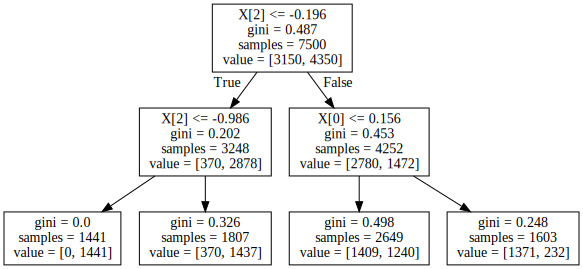

In [24]:
import graphviz 
#caso precise instalar a biblioteca do python !pip install graphviz==0.10
#a linha de comando !apt-get install graphviz

grafico = graphviz.Source(dot_data)
grafico

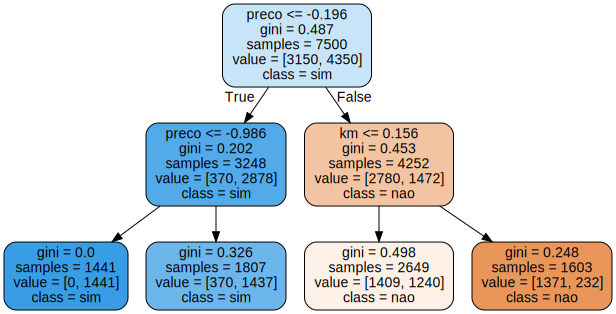

In [25]:
from sklearn.tree import export_graphviz
#colocar os nomes da colunas
features = x.columns
dot_data = export_graphviz(modelo, 
                           filled= True,
                           rounded = True,
                           out_file=None, 
                           feature_names=features,
                           class_names = ['nao', 'sim'])
grafico = graphviz.Source(dot_data)
grafico

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


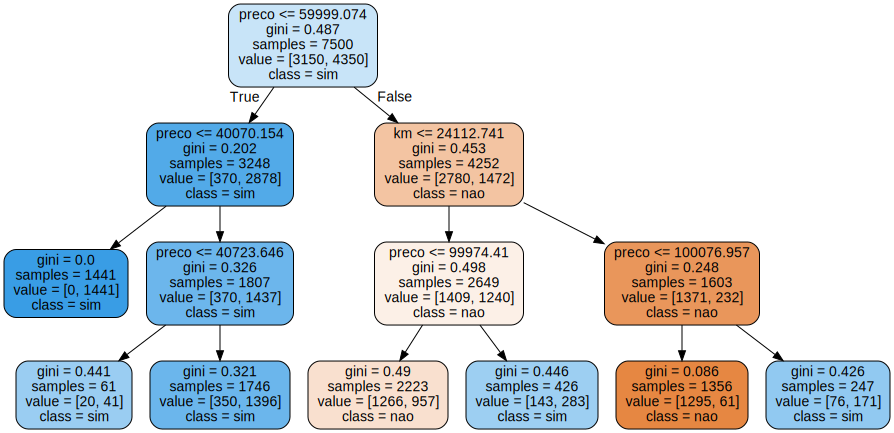

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#max_depth nivel da arvore
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

from sklearn.tree import export_graphviz
#colocar os nomes da colunas
features = x.columns
dot_data = export_graphviz(modelo, 
                           filled= True,
                           rounded = True,
                           out_file=None, 
                           feature_names=features,
                           class_names = ['nao', 'sim'])
grafico = graphviz.Source(dot_data)
grafico